In [1]:
import torch
torch.set_grad_enabled(False) # REQUIRED

## 1. Generating the data

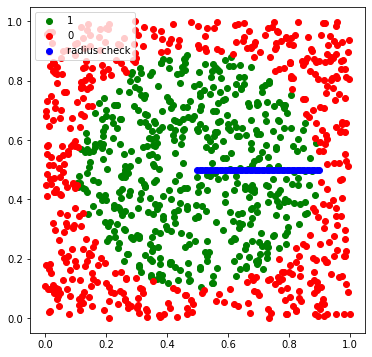

In [2]:
from utils import generate_dataset, show_dataset

X, y = generate_dataset()
show_dataset(X, y)

## using ReLU

In [3]:
from module import ReLU

r = ReLU()

r.forward(torch.tensor([-2, 0, 1, -0.4, 5]))

tensor([0., 0., 1., 0., 5.])

### Testing linear regression

In [271]:
import torch

class Module(object):
    def forward(self , *input):
        raise NotImplementedError
    def backward(self , *gradwrtoutput):
        raise NotImplementedError
    def param(self):
        return []


class NewLinear(Module):
    def __init__(self, input_dim, output_dim, sigma = 1):
        self.W = torch.empty((output_dim, input_dim)).normal_(0, sigma)
        self.b = torch.empty(output_dim).normal_(0, sigma)
        self.zero_grad()

    def zero_grad(self):
        self.grad_W = torch.zeros(self.W.shape)
        self.grad_b = torch.zeros(self.b.shape)


    def forward(self, input_):
        """ input_: (B x D_input)"""

        self.input2 = input_
        output = (torch.mm(self.W, input_.T) + self.b.unsqueeze(1)).T

        return output
        
    
    def backward(self, grad_output):
        input_ = self.input2
    
        grad_input = torch.mm(grad_output, self.W)
        self.grad_W += torch.mm(grad_output.T, input_)
        self.grad_b += grad_output.T.sum(axis = 1)

        return grad_input


    def param(self):
        return [(self.W, self.grad_W), (self.b, self.grad_b)]


Text(0.5, 1.0, 'Error on b')

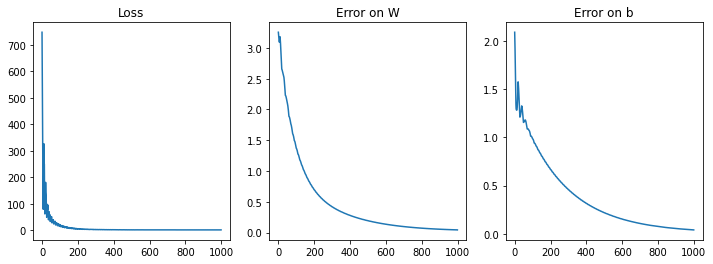

In [305]:
from module import Linear 
import matplotlib.pyplot as plt



n_samples = 1000
input_dim = 5
output_dim = 3

x0 = torch.rand((n_samples, input_dim))


y = torch.rand((n_samples, output_dim))


W = torch.empty((output_dim, input_dim)).normal_(0, 1)
b = torch.empty(output_dim).normal_(0, 1)
y = torch.zeros((n_samples, output_dim))


for i in range(n_samples):
    x = x0[i]
    y[i] = torch.mv(W, x) + b
    
y += 0.05*torch.empty(y.shape).normal_(0, 1)
    
ll = NewLinear(input_dim, output_dim)

losses, d_w, d_b = [], [], []


nb_epochs = 100
mini_batch_size = 100
lr = 1e-3/n_samples*mini_batch_size



for epoch in range(nb_epochs):
    ll.zero_grad()
    for i in range(0, x0.size(0), mini_batch_size):
        input_ = x0.narrow(0, i, mini_batch_size)
        target = y.narrow(0, i, mini_batch_size)
        x2 = ll.forward(input_)
        error = target - x2
        loss = torch.pow(error, 2).sum()

        grad_output = -2*error
        grad_input = ll.backward(grad_output)
        

        ll.W -= lr*ll.grad_W
        ll.b -= lr*ll.grad_b
        losses.append(loss.item())
        d_w.append(torch.norm(W-ll.W))
        d_b.append(torch.norm(b-ll.b.squeeze()))
    
f, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].plot(losses)
ax[0].set_title('Loss')
ax[1].plot(d_w)
ax[1].set_title('Error on W')
ax[2].plot(d_b)
ax[2].set_title('Error on b')

In [ ]:
gra

In [306]:
W, ll.W

(tensor([[-0.3268, -0.4273, -0.8999, -1.3090, -0.7707],
         [-0.4902, -0.7733,  0.2691, -0.0957, -1.1348],
         [-0.8603, -1.2007,  0.7741, -0.4936,  0.5315]]),
 tensor([[-0.3219, -0.4061, -0.8812, -1.2940, -0.7494],
         [-0.4917, -0.7762,  0.2770, -0.1010, -1.1297],
         [-0.8594, -1.2020,  0.7852, -0.4899,  0.5245]]))

In [307]:
b, ll.b.squeeze()

(tensor([ 1.4904, -0.9787, -0.0665]), tensor([ 1.4513, -0.9804, -0.0667]))

In [308]:
d_w[-1], d_b[-1]

(tensor(0.0425), tensor(0.0392))

In [296]:
M = torch.rand((5, 4, 3))
v = torch.rand(3)
torch.matmul(M, v)

tensor([[1.4159, 1.2256, 1.2916, 0.9745],
        [1.1025, 0.7352, 1.0391, 0.7797],
        [1.0775, 0.9949, 0.5835, 1.0600],
        [0.6948, 1.1519, 0.9610, 1.5581],
        [0.8536, 0.4937, 1.0971, 0.7720]])

In [10]:
torch.mv(M[0], v)

tensor([1.0464, 0.9989, 0.6322, 1.0420])

In [67]:
torch.tensor([[-37.4304, 2, 5],
        [-72.3675, 2, 6],
        [-37.5306, 2, 7]]).sum(axis = 1).unsqueeze(1)

tensor([[-30.4304],
        [-64.3675],
        [-28.5306]])